In [1]:
#Librerias comunes
import seaborn as sns
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Librerias Scikitlearn para feature engineering

In [2]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
# Importing metrics from sklearn
from sklearn import metrics

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT

Cargamos de nuevo la base de datos

In [5]:
# Creamos el dataframe df_airbnb usando pandas
df_airbnb = pd.read_csv('/Users/ylpulgar/Jupyter/data_Bases/AB_US_2020.csv')

/Users/ylpulgar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
5,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,14/01/20,0.49,1,294,Asheville
6,213006,Blue Gate West,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,1,137,30/11/19,1.35,1,0,Asheville
7,246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,3,57,30/10/19,0.53,2,106,Asheville
8,259576,"Private, peaceful, and free goat therapy",1362726,Julia,NaN,28805,35.61929,-82.48114,Entire home/apt,71,28,537,05/04/20,5.01,1,207,Asheville
9,295496,The Fern Street Apt near Biltmore,1501882,Debbie,NaN,28803,35.55537,-82.53539,Entire home/apt,50,90,31,14/06/19,0.29,1,339,Asheville


Primero vamos a tratar los casos de missing que vimos en el analisis exploratorio

In [7]:
missing = df_airbnb.isna().sum()
missing /= df_airbnb.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing

,Precent Of Missing Values
id,0.000000
name,0.012388
host_id,0.000000
host_name,0.014600
neighbourhood_group,51.252046
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


para el caso de esta base de datos no tenemos variables numericas con variables con missing values,
dadpo este caso vamos a eliminar los regitros que son menos de 0.01 porciento que no tienen nombre de host,
pero te dejo como puedes imputar en le caso de que tuvieras variables continuas numericas y discretas con missing values

La variable no posee los sufientes registros para poder analizada mas de 50% la eliminaremos en este caso

In [8]:
df_airbnb = df_airbnb[df_airbnb.price != 0]

In [9]:
# Removing Outliers - Variable respuesta

lower_bound = .10
upper_bound = .90
df_airbnb_clean = df_airbnb[df_airbnb['price'].between(df_airbnb['price'].quantile(lower_bound), df_airbnb['price'].quantile(upper_bound), inclusive=True)]



/var/folders/w5/pkjvwsk57r5708nf4562sbl40000gn/T/ipykernel_53216/972132898.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_airbnb_clean = df_airbnb[df_airbnb['price'].between(df_airbnb['price'].quantile(lower_bound), df_airbnb['price'].quantile(upper_bound), inclusive=True)]


In [59]:
def detect_discrete_outliers(data):
    threshold = 2
    mean = data.median()
    std = data.std()
    z_score = (data - mean)/std 
    outliers = abs(z_score) > threshold

    return outliers

In [60]:
df_airbnb = df_airbnb[~df_airbnb.groupby('city')['price'].transform(detect_discrete_outliers)]

In [61]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106729 entries, 0 to 112915
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              106729 non-null  int64  
 1   name                            106729 non-null  object 
 2   host_id                         106729 non-null  int64  
 3   host_name                       106712 non-null  object 
 4   neighbourhood_group             50206 non-null   object 
 5   neighbourhood                   106729 non-null  object 
 6   latitude                        106729 non-null  float64
 7   longitude                       106729 non-null  float64
 8   room_type                       106729 non-null  object 
 9   price                           106729 non-null  int64  
 10  minimum_nights                  106729 non-null  int64  
 11  number_of_reviews               106729 non-null  int64  
 12  last_review     

In [62]:
# Removing Outliers - Variable explicativa

df_airbnb = df_airbnb[df_airbnb['number_of_reviews'] > 0]
df_airbnb = df_airbnb[df_airbnb['calculated_host_listings_count'] < 10]
df_airbnb = df_airbnb[df_airbnb['number_of_reviews'] < 200]
df_airbnb = df_airbnb[df_airbnb['minimum_nights'] < 10]
df_airbnb = df_airbnb[df_airbnb['reviews_per_month'] < 5]

Texmining Name description

En lenguaje natural NLP, la colección de texto descriptivo se conoce como corpus. Esto es una matrix document-term(una lista de términos puede verse como un diccionario). Para reducir el número de términos y centrarse en los más importantes por documento, se eliminan las palabras que no están en el lenguaje de interés y las palabras vacías(Stopwords). Las palabras se lematizan(Ordene para agrupar formas flexionadas o variantes de la misma palabra) y se utiliza un tokenizador RegEx para ignorar cadenas no alfanuméricas.
 Las palabras restantes se convierten luego en una una lista de word_id, word_frequency 2-tuplas para Document-Term-Matrix.
Con esto en su lugar, podemos usar la asignación de Dirichlet latente (LDA) para descubrir temas inherentes al corpus, clasificar el corpus de acuerdo con los temas aprendidos y usarlos como características para el modelo de regresión.



hagamos un espacio en este notebook para realizar un analisis paralelo pero independiente a el precio, 
pesemos en este momento en la variale name la cual es la descripcion del listing como si fuera un solo
data set que queremos analizar

In [14]:
# 1. definir el vector de texto

In [63]:

from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#nltk.download()

In [64]:

stop_words = set(stopwords.words('english')) 

In [65]:
df_airbnb['name'].describe()

count                  106729
unique                 100104
top       home away from home
freq                      102
Name: name, dtype: object

In [66]:
df_airbnb.name = df_airbnb.name.astype(str)
df_airbnb.name=df_airbnb.name.str.lower()
df_airbnb.name=df_airbnb.name.replace(['â','-','@','$','&','!','ã','â'],'',regex=True)


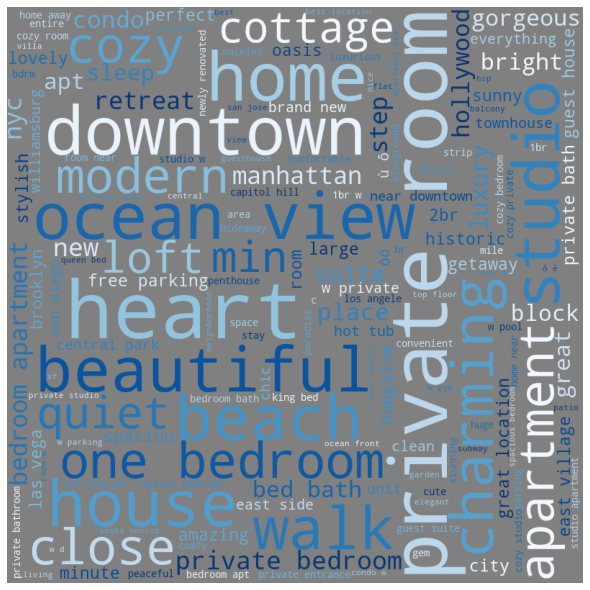

In [67]:
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df_airbnb_clean.name: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens)+" "  
wordcloud = WordCloud(width = 800, height = 800, 
                      colormap="Blues",
                      background_color ='grey', 
                      stopwords = stopwords, 
                        min_font_size = 10).generate(comment_words)                        
plt.figure(figsize = (8, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 



In [68]:
df_airbnb["description"] = df_airbnb["name"].apply(nltk.word_tokenize)
df_airbnb["description"] =df_airbnb["description"].apply(lambda x: [item for item in x if item not in stop_words])


In [69]:
df_airbnb["description"].head()

0    [charming, victorian, home, twin, beds, +, bre...
1                                   [terrace, cottage]
2                                   [blue, gate, west]
3                      [asheville, dreamer, 's, cabin]
4       [luxurious, mountain, guest, suite, apartment]
Name: description, dtype: object

In [70]:
val=pd.Series(np.concatenate([x for x in df_airbnb.description])).value_counts()
val = pd.DataFrame({'ngrams': list(val.keys()),
                   'count': list(val[:])})
val=val[val.ngrams != '.' ]
val=val.head(30)
val=val['ngrams'][1:30]
val

1       private
2          room
3       bedroom
4          home
5          cozy
6     apartment
8         beach
9             2
10       studio
11         near
12        house
13            1
14     spacious
15     downtown
16          apt
17       modern
18    beautiful
19         park
20        suite
21        condo
22            )
23            (
24         view
25        heart
26         bath
27        close
28     location
29          new
30          bed
Name: ngrams, dtype: object

In [71]:
def inner(text):    
    for word in text.split(' '):
        for c in val:
            if word==c:
               return c
    return 'Null'       
c1=[]
for text in df_airbnb['name']:
    c1.append(inner(text))
df_airbnb['Name_new']=c1
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106729 entries, 0 to 112915
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              106729 non-null  int64  
 1   name                            106729 non-null  object 
 2   host_id                         106729 non-null  int64  
 3   host_name                       106712 non-null  object 
 4   neighbourhood_group             50206 non-null   object 
 5   neighbourhood                   106729 non-null  object 
 6   latitude                        106729 non-null  float64
 7   longitude                       106729 non-null  float64
 8   room_type                       106729 non-null  object 
 9   price                           106729 non-null  int64  
 10  minimum_nights                  106729 non-null  int64  
 11  number_of_reviews               106729 non-null  int64  
 12  last_review     

In [72]:
df_airbnb['Name_new'].value_counts(normalize=True)*100

Null         25.315519
private       9.440733
cozy          6.874420
room          5.541137
home          4.384001
spacious      3.818081
studio        3.320560
modern        3.189386
bedroom       3.153782
beautiful     3.143476
apartment     3.021672
beach         3.001059
house         2.915796
2             2.851146
1             2.608476
new           2.031313
downtown      1.747416
suite         1.737110
condo         1.619054
near          1.537539
view          1.496313
apt           1.454150
park          1.391374
location      1.215227
close         0.994107
heart         0.991296
bed           0.895727
bath          0.255788
(             0.044974
)             0.009370
Name: Name_new, dtype: float64

In [73]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,description,Name_new,Geo_cl
0,38585,charming victorian home twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville,"[charming, victorian, home, twin, beds, +, bre...",home,2
1,209068,terrace cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,14/01/20,0.49,1,294,Asheville,"[terrace, cottage]",Null,2
2,213006,blue gate west,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,1,137,30/11/19,1.35,1,0,Asheville,"[blue, gate, west]",Null,2
3,246315,asheville dreamer's cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,3,57,30/10/19,0.53,2,106,Asheville,"[asheville, dreamer, 's, cabin]",Null,2
4,427497,luxurious mountain guest suite apartment,1909922,Milan,NaN,28803,35.49111,-82.48438,Entire home/apt,125,2,40,17/08/20,0.42,1,339,Asheville,"[luxurious, mountain, guest, suite, apartment]",suite,2


# Geo

El más popular y útil de los métodos no supervisados es el análisis de cluster el cual consiste en agrupar objetos por similitud, en grupos o conjuntos de manera que los miembros del mismo grupo tengan características similares. Es la tarea principal de la minería de datos exploratoria y es una técnica común en el análisis de datos estadísticos.


Agrupamiento basado en conectividad (agrupamiento jerárquico)
Agrupamiento basado en centroide
Agrupamiento basado en distribuciones
Agrupamiento basado en densidad

Agrupamiento basado en centroide - KMeans
En el agrupamiento basado en centroide, los grupos están representados por un vector central, el cual puede no necesariamente ser un miembro del conjunto de datos. Cuando el número de grupos está fijado a k, k-means da una definición formal como un problema de optimización: encontrar los k centros de los grupos y asignar los objetos al centro del grupo más cercano, tal que el cuadrado de las distancias del grupo al centro están minimizadas. Este problema de optimización es NP-duro, y por ello el objetivo común es buscar solo soluciones aproximadas. Un método aproximado bien conocido es el algoritmo de Lloyd,10​ a menudo referido como "k-means". Aun así solo encuentra un óptimo local, y generalmente se ejecuta varias veces con inicializaciones aleatorias. Variaciones de k-means a menudo incluyen otras optimizaciones como: escoger el mejor resultado de varias corridas, restringir el centroide a miembros del conjunto de datos (k-medoids), escoger medianas (k-medians), escoger los centros iniciales aleatoriamente (K-means++) o permitir una asignación de grupos difusa (Fuzzy c-means).

La mayoría de los tipos de k-means requieren que el número de grupos sea especificado por adelantado, el cual está considerado una de las más grandes dificultades de estos algoritmos. Además, los algoritmos prefieren grupos de aproximadamente media similar, debido a que siempre asignarán un objeto al más cercano centroide. Esto a menudo provoca cortes incorrectos en los bordes de los grupos (lo cual no es una sorpresa ya que el algoritmo optimiza los centroides, no las fronteras).

K-means tiene un número de propiedades teóricas interesantes. Primero, las particiones del espacio de datos son estructuras conocidas como esquemas de Voronoi. Segundo, está conceptualmente cerca de la clasificación de k-nearest neighborhood, y por tanto muy popular en aprendizaje de máquina. Tercero, puede ser visto como una variación de la clasificación basada en modelos, y el algoritmo de Lloyd como variación del algoritmo Expectation-maximization para el modelo que se discutirá debajo.


In [74]:
from sklearn.cluster import KMeans

In [75]:
Geospivot = df_airbnb.loc[:,('longitude','latitude' )]

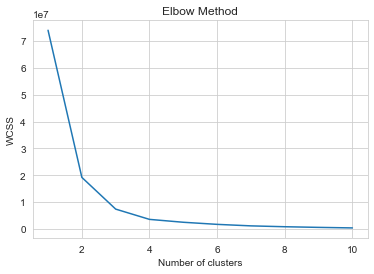

In [76]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=15, random_state=0)
    kmeans.fit(Geospivot)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)


In [78]:
y_km = km.fit_predict(Geospivot)

In [79]:
Geospivot['Geo_cl']= km.fit_predict(Geospivot)

In [80]:
city = df_airbnb['city'].value_counts()

In [81]:
pd.DataFrame(city.rank())

,city
New York City,28.0
Los Angeles,27.0
Hawaii,26.0
San Diego,25.0
Broward County,24.0
Austin,23.0
Washington D.C.,22.0
San Clara Country,21.0
Chicago,20.0
Clark County,19.0


In [106]:
df_airbnb = pd.merge(df_airbnb,Geospivot,how="inner",on=['latitude','longitude']  )

In [107]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,description,Name_new,Geo_cl_x,Geo_cl_y,Geo_cl
0,38585,charming victorian home twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,...,16/02/20,1.14,1,0,Asheville,"[charming, victorian, home, twin, beds, +, bre...",home,2,2,2
1,209068,terrace cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,...,14/01/20,0.49,1,294,Asheville,"[terrace, cottage]",Null,2,2,2
2,213006,blue gate west,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,...,30/11/19,1.35,1,0,Asheville,"[blue, gate, west]",Null,2,2,2
3,246315,asheville dreamer's cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,...,30/10/19,0.53,2,106,Asheville,"[asheville, dreamer, 's, cabin]",Null,2,2,2
4,427497,luxurious mountain guest suite apartment,1909922,Milan,NaN,28803,35.49111,-82.48438,Entire home/apt,125,...,17/08/20,0.42,1,339,Asheville,"[luxurious, mountain, guest, suite, apartment]",suite,2,2,2


### Sleccion de caracteristicas X y variable objetivo Y

In [108]:
X = df_airbnb[['host_id','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','city','Geo_cl','Name_new']]
y = df_airbnb['price']

### Definir las variables tipo numericas

### Definir las variables tipo categoricas

In [109]:
categorical = [ 'room_type','Name_new','Geo_cl','city']

categorical = [x for x in list(X.columns) if x in categorical]

In [86]:
numerical = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365', 'minimum_nights']
numerical = [x for x in list(X.columns) if x in numerical]

In [87]:
discreet = ['host_id']
discreet = [x for x in list(X.columns) if x in discreet]

In [110]:
print(categorical )

['room_type', 'city', 'Geo_cl', 'Name_new']


In [111]:
# Pipeline Categoricó
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Pipeline Discreto
dist_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('KBinsDiscretizer', KBinsDiscretizer(n_bins=130425, encode='ordinal', strategy='uniform'))
])


    
# Pipeline Numericó
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


#column transformer
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical),
    ('dist',dist_pipe, discreet)
])
preprocessor.fit(X)

# Nombres de las columnas binarias-onehotencoding
cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categorical)

columns = np.append(cat_columns, numerical)
columns = np.append(columns,discreet )




In [112]:
X_trans = preprocessor.transform(X)

In [113]:
Xtrans_arr = pd.DataFrame(X_trans,columns =columns )

In [114]:
Xtrans_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504921 entries, 0 to 10504920
Data columns (total 73 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   room_type_Entire home/apt       float64
 1   room_type_Hotel room            float64
 2   room_type_Private room          float64
 3   room_type_Shared room           float64
 4   city_Asheville                  float64
 5   city_Austin                     float64
 6   city_Boston                     float64
 7   city_Broward County             float64
 8   city_Cambridge                  float64
 9   city_Chicago                    float64
 10  city_Clark County               float64
 11  city_Columbus                   float64
 12  city_Denver                     float64
 13  city_Hawaii                     float64
 14  city_Jersey City                float64
 15  city_Los Angeles                float64
 16  city_Nashville                  float64
 17  city_New Orleans         

X1 = Xtrans_arr[['city_New York City',
'city_Portland',
'Name_new_private',
'Name_new_room',
'room_type_Shared room',
'city_Columbus',
'number_of_reviews',
'city_Seattle',
'city_Denver',
'city_Washington D.C.',
'Name_new_apartment',
'Name_new_spacious',
'Name_new_suite',
'Name_new_beautiful',
'Name_new_1',
'city_Chicago',
'room_type_Private room',
'city_Jersey City',
'Name_new_apt',
'city_Oakland',
'calculated_host_listings_count',
'Geo_cl',
'city_Austin',
'Name_new_studio',
'Name_new_cozy',
'city_Broward County',
'city_Santa Cruz County',
'city_Los Angeles',
'city_Hawaii',
'Name_new_luxury',
'Name_new_house',
'room_type_Hotel room',
'Name_new_beach',
'city_Cambridge',
'city_San Francisco',
'Name_new_modern',
'Name_new_Null',
'availability_365',
'city_Nashville',
'city_San Mateo County',
'Name_new_home',
'Name_new_2',
'Name_new_new',
'city_Boston',
'city_Rhode Island',
'room_type_Entire home/apt',
'host_id',
'Name_new_ocean']]

### Seleccion de la muestra de entrenamiento y test

In [115]:

X_train, X_test, y_train, y_test = train_test_split(Xtrans_arr, y, test_size=0.4, random_state=101)

# regresion Lineal

In [116]:
from sklearn.linear_model import LinearRegression

reglineal = LinearRegression().fit(X_train, y_train)
reglineal.score(X_train, y_train)
ylineal=reglineal.predict(X_test)

In [117]:
reglineal.score(X_train, y_train)

0.6032163304977114

### Decision Tree Regressor 

In [118]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score


regressor = DecisionTreeRegressor(random_state=1, max_depth=64,min_samples_leaf=64)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=64, min_samples_leaf=64, random_state=1)

In [119]:
score = regressor.score(X_test, y_test)

In [120]:
score

0.9885428299991337

## Random Forest Regressor

In [121]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=23, random_state=7)
RF = regr.fit(X_train , y_train)


In [122]:
RF.score(X_train , y_train)

0.9972158690281743

In [123]:
Yrf = RF.predict(X_test)

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, Yrf))
print('MSE:', metrics.mean_squared_error(y_test, Yrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Yrf)))

MAE: 0.7721974816997176
MSE: 59.24568713113389
RMSE: 7.6971220031342815


In [ ]:
def plot_feature_importance_tree_model(RF,width=15,height=15):
    import matplotlib.pyplot as plt
    feature_importance = regressor.feature_importances_
    
    # make importances relative to max importance
    feature_importance = feature_importance
    sorted_idx = np.argsort(feature_importance)
    
    pos = np.arange(sorted_idx.shape[0]) + 1
    plt.figure(figsize=(width, height))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos,np.array(X_train.columns)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
plot_feature_importance_tree_model(RF)

## Neural network 

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(23,23,23),activation="relu" ,learning_rate_init = 0.01,random_state=1, max_iter=27000).fit(X_train, y_train)

In [ ]:
ynn=reg.predict(X_test)

In [ ]:
print('reg score',reg.score(X_test, y_test))

In [ ]:
reg.score(X_test, y_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, ynn))
print('MSE:', metrics.mean_squared_error(y_test, ynn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ynn)))

# Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X_train , y_train)


In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train , y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh" ,color = 'blue', figsize=(15,7))
plt.title("Feature importance using Lasso Model")

In [ ]:
imp_coef = pd.DataFrame(coef.sort_values())

In [ ]:
imp_coef.to_csv('/Users/ylpulgar/Jupyter/data_Bases/airb&bcoef.csv')

In [ ]:
regRidge = Ridge(alpha=1.0)
regRidge.fit(X_train, y_train)
Ridge()

In [ ]:
regRidge.score(X_test, y_test)

Reescalar

In [ ]:
y_train2 = y_train.values.reshape(-1, 1)

In [ ]:
y_test1 = y_test.values.reshape(-1, 1)

In [ ]:

from sklearn.preprocessing import StandardScaler
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(y_train2)
# transform training dataset




In [ ]:
trainy2 = scaler.transform(y_train2)
y_test1 = scaler.transform(y_test1)

In [ ]:
regRidge = Ridge(alpha=1.0)
regRidge.fit(X_train, trainy2)
Ridge()

In [ ]:
regRidge.score(X_test, y_test1)

In [ ]:
print('Total number of feature coLumns: ', len(X_train))

In [ ]:
X_train.info()

In [ ]:
from tensorflow.keras.optimizers import SGD
# define model
model = Sequential()
model.add(Dense(25, input_dim=23, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


In [ ]:
# compile model


In [ ]:
history.score(X_test, testy)

In [ ]:
print('reg score',history.score(X_test, testy))

In [ ]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()